# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

# 2. Import Dataset

In [2]:
df = pd.read_csv('train_new.csv', index_col= 'Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,84,Good,8


In [3]:
pd.options.display.max_columns = 100
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorch,HouseRate_Cond_and_Material,Age_of_House
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,61,Above Average,5
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,Good,31
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,42,Above Average,7
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,307,Above Average,91
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,84,Good,8


In [4]:
df.shape

(1460, 75)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSSubClass                   1460 non-null   int64  
 1   MSZoning                     1460 non-null   object 
 2   LotFrontage                  1201 non-null   float64
 3   LotArea                      1460 non-null   int64  
 4   Street                       1460 non-null   object 
 5   LotShape                     1460 non-null   object 
 6   LandContour                  1460 non-null   object 
 7   Utilities                    1460 non-null   object 
 8   LotConfig                    1460 non-null   object 
 9   LandSlope                    1460 non-null   object 
 10  Neighborhood                 1460 non-null   object 
 11  Condition1                   1460 non-null   object 
 12  Condition2                   1460 non-null   object 
 13  BldgType          

### Data Description

In [6]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotPorch,Age_of_House
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,0.613014,1.767123,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,87.084932,36.547945
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.644666,0.747315,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,105.190364,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,0.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,48.000000,35.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,136.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,4.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,1027.000000,136.000000


In [7]:
df.describe(include='O')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,HouseRate_Cond_and_Material
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6,10
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,Above Average
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,1267,1198,730


# Dataset Splitting

In [8]:
X = df.drop(columns="SalePrice")
y = df.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 74), (292, 74), (1168,), (292,))

### Selecting the columns as a numerical features

In [9]:
numeric_features = X_train.select_dtypes(include=[np.number])

In [10]:
numeric_features = list(numeric_features.drop(columns=['BsmtHalfBath','BsmtFullBath','Fireplaces','FullBath','HalfBath', 'GarageCars','KitchenAbvGr','OverallCond','OverallQual','BedroomAbvGr','KitchenAbvGr']))

###  Selecting the columns as a categorical features

In [11]:
categoric_features = X_train.select_dtypes(include = [np.object])

C:\Users\Malik Afu Hamid\AppData\Local\Temp\ipykernel_6636\1353433241.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoric_features = X_train.select_dtypes(include = [np.object])


In [12]:
categoric_features

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,HouseRate_Cond_and_Material
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
255,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,Above Average
1067,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Good
639,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,Wd Sdng,None,TA,TA,CBlock,Fa,TA,No,Unf,Unf,GasA,Gd,Y,FuseA,TA,Typ,NaN,NaN,NaN,NaN,NaN,P,WD,Normal,Above Average
800,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,BrkTil,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Detchd,Unf,TA,TA,Y,WD,Normal,Above Average
381,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Sdng,None,TA,TA,BrkTil,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Above Average
1131,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Plywood,None,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,TA,Detchd,Unf,TA,TA,Y,WD,Normal,Below Average
1295,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,WdShing,Plywood,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,WD,Normal,Above Average


In [13]:
categoric_features = list(categoric_features.drop(columns=['HouseRate_Cond_and_Material','KitchenQual','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtQual','BsmtFinType1','Electrical','BsmtFinType2','HeatingQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','FireplaceQu','Neighborhood','Exterior1st','Exterior2nd','LandContour']))

### Selecting the type of categorical columns

In [14]:
categorical2 = list(X_train[['BsmtHalfBath','BsmtFullBath','Fireplaces','FullBath','HalfBath', 'GarageCars','OverallCond','OverallQual','BedroomAbvGr','KitchenAbvGr']])

In [15]:
Ordinal = list(X_train[['HouseRate_Cond_and_Material','KitchenQual','LotShape','Utilities','LandSlope','ExterQual','ExterCond','BsmtExposure','BsmtQual','BsmtFinType1','Electrical','BsmtFinType2','HeatingQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','FireplaceQu','LandContour']])

In [16]:
Binary = list(X_train[['Neighborhood','Exterior1st','Exterior2nd']])

### Selecting encoder 

In [17]:
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from jcopml.tuning.space import Integer, Real

In [18]:
cat_pipe2 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('OrdinalEncoder', ce.OrdinalEncoder())
])

In [19]:
cat_pipe3 = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('BinaryEncoder', ce.BinaryEncoder())
])

# Modeling

In [20]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning.space import Integer, Real

from sklearn.impute import SimpleImputer

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_features),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_features),
    ('categoric2', cat_pipe(), categorical2),
    ('ordinal', cat_pipe2, Ordinal),
    ('binary', cat_pipe3, Binary),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMRegressor(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.1845837458567821, 'algo__learning_rate': 0.14340367528772735, 'algo__max_depth': 6, 'algo__min_child_samples': 28, 'algo__min_child_weight': 0.002921447042060988, 'algo__n_estimators': 212, 'algo__num_leaves': 249, 'algo__reg_alpha': 0.37418166596071695, 'algo__reg_lambda': 0.2308516815110802, 'algo__subsample': 0.3152501249695247}
0.9790693837066755 0.8740040968643468 0.8866854804979855


# Feature Importance

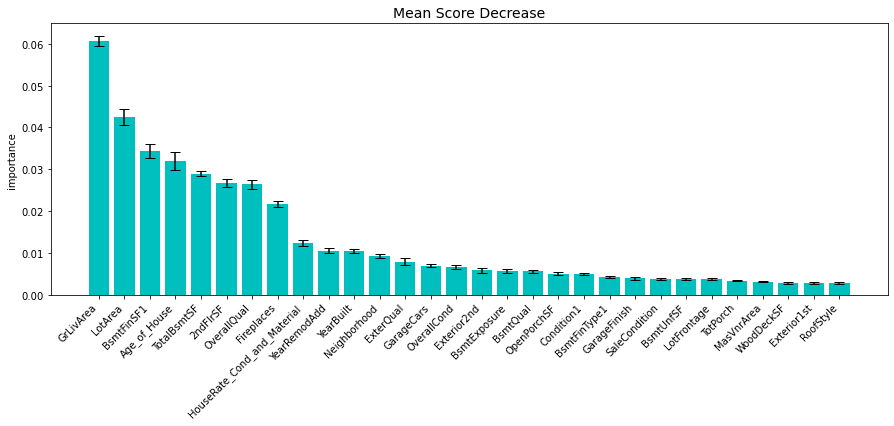

In [22]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=30)

In [23]:
numeric_imp = ['GrLivArea','LotArea','BsmtFinSF1','2ndFlrSF','YearRemodAdd','YearBuilt','OpenPorchSF',
               'LotFrontage','BsmtUnfSF','MasVnrArea','TotPorch','WoodDeckSF','MoSold','TotalBsmtSF']
categoric_imp = ['Condition1','HouseStyle','RoofStyle','MasVnrType']
categoric_imp2 = ['OverallCond','OverallQual','Fireplaces','FullBath','GarageCars','BsmtFullBath']
Ordinal_imp = ['BsmtExposure','KitchenQual','BsmtQual']
Binary_imp = ['Neighborhood','Exterior2nd','Exterior1st']

In [24]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMRegressor(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.8767930832880343, 'algo__learning_rate': 0.1764396768338155, 'algo__max_depth': 2, 'algo__min_child_samples': 10, 'algo__min_child_weight': 0.0011575995526672772, 'algo__n_estimators': 300, 'algo__num_leaves': 121, 'algo__reg_alpha': 0.44706085467784895, 'algo__reg_lambda': 0.8287522363768162, 'algo__subsample': 0.6187787356776067}
0.969366161412319 0.8697386805957649 0.9048375719971079


`Feature Importance can increase test scores model. Therefore, I'll keep it`

# Polynomial Feature

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])



pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMRegressor(n_jobs=-1, random_state=42))
])


parameter = {
            'prep__numeric__poly__degree': Integer(low=1, high=3),
            'prep__numeric__poly__interaction_only': [True, False],
            'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.18949725348341068, 'algo__learning_rate': 0.030643924382700242, 'algo__max_depth': 8, 'algo__min_child_samples': 23, 'algo__min_child_weight': 0.006764253336992722, 'algo__n_estimators': 291, 'algo__num_leaves': 282, 'algo__reg_alpha': 0.4446109170307133, 'algo__reg_lambda': 0.0022268966389921638, 'algo__subsample': 0.6166203874554803, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.9509457835587934 0.8681443839583112 0.8876629832524549


`Polynomial has decreased test scores models. Therefore, I don't to use the polynomial feature for the next step.`

# Fine Tuning

In [26]:
from jcopml.tuning.space import Integer, Real

In [27]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMRegressor(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=300),
            'algo__min_child_samples': Integer(low=10, high=40),
            'algo__min_child_weight': Real(low=-3, high=-2, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-1, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__colsample_bytree': 0.8767930832880343, 'algo__learning_rate': 0.1764396768338155, 'algo__max_depth': 2, 'algo__min_child_samples': 10, 'algo__min_child_weight': 0.0011575995526672772, 'algo__n_estimators': 300, 'algo__num_leaves': 121, 'algo__reg_alpha': 0.44706085467784895, 'algo__reg_lambda': 0.8287522363768162, 'algo__subsample': 0.6187787356776067}
0.969366161412319 0.8697386805957649 0.9048375719971079


# Evaluation

In [28]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


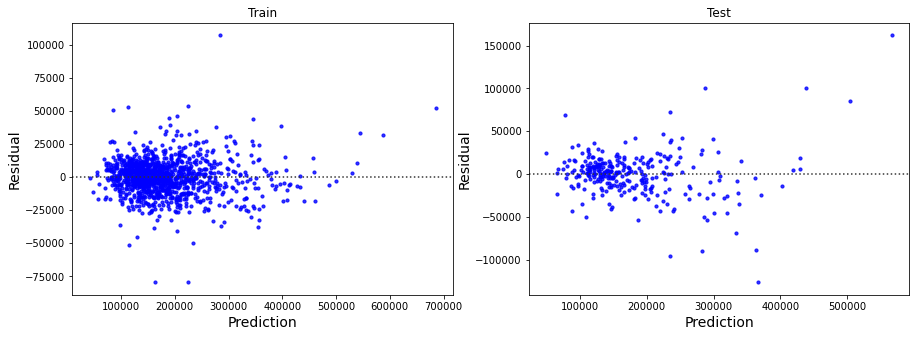

In [29]:
plot_residual(X_train, y_train, X_test, y_test, model)

In [30]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotPorch,HouseRate_Cond_and_Material,Age_of_House,pred,actual,error
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,1872,0,4316,0,1,3,1,4,1,Ex,Typ,2,Ex,Attchd,Fin,3,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,50,Very Good,13,567151.511401,755000,187848.488599
1047,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,Gd,TA,PConc,Ex,TA,Av,GLQ,240,Unf,0,1752,1992,GasA,Ex,Y,SBrkr,876,0,2868,0,0,3,1,4,1,Ex,Typ,1,Gd,BuiltIn,Fin,3,TA,TA,Y,214,108,0,0,0,0,0,7,2006,New,Partial,108,Good,1,438570.242375,556581,118010.757625
582,20,RL,98.0,12704,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,0,0,2042,0,0,2,1,3,1,Ex,Typ,1,Gd,Attchd,RFn,3,TA,TA,Y,0,90,0,0,0,0,0,8,2009,New,Partial,90,Good,1,366759.058306,253293,113466.058306
775,20,RL,110.0,14226,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,375.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1935,1935,GasA,Gd,Y,SBrkr,0,0,1973,0,0,2,0,3,1,Gd,Typ,1,Gd,Attchd,Fin,3,TA,TA,Y,315,45,0,0,0,0,0,7,2007,New,Partial,45,Good,1,287020.407647,395000,107979.592353
899,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2188,Unf,0,142,2330,GasA,Ex,Y,SBrkr,0,0,2364,1,0,2,1,2,1,Ex,Typ,2,Gd,Attchd,Fin,3,TA,TA,Y,0,67,0,0,0,0,0,3,2010,New,Partial,67,Good,1,504533.654633,611657,107123.345367
589,20,RL,65.0,25095,Pave,IR1,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,5,8,1968,2003,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Gd,GLQ,1324,Unf,0,113,1437,GasA,Ex,Y,SBrkr,0,0,1473,2,0,1,0,1,1,Ex,Typ,2,Gd,Attchd,Unf,1,TA,TA,Y,0,48,0,0,60,0,0,6,2009,WD,Partial,108,Good,41,233936.780743,143000,90936.780743
1174,50,RL,138.0,18030,Pave,IR1,Bnk,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,6,1946,1994,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,152,BLQ,469,977,1598,GasA,TA,Y,SBrkr,971,479,3086,0,0,3,0,3,1,Ex,Maj1,1,Gd,NaN,NaN,0,NaN,NaN,Y,122,0,0,0,0,0,0,3,2007,WD,Normal,0,Above Average,61,282250.054388,200500,81750.054388
219,50,RL,NaN,15660,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,9,1939,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,No,BLQ,341,Unf,0,457,798,GasA,Ex,Y,SBrkr,817,0,1954,0,1,1,1,3,1,Gd,Typ,2,TA,Attchd,Unf,2,TA,TA,Y,0,119,150,0,0,0,0,5,2008,WD,Normal,269,Very Good,69,234077.523616,311500,77422.476384
1025,20,RL,NaN,15498,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1976,1976,Hip,WdShake,Stone,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,ALQ,1165,LwQ,400,0,1565,GasA,TA,Y,SBrkr,0,0,2898,1,0,2,0,2,1,Gd,Typ,1,Gd,Attchd,Fin,2,TA,TA,Y,0,72,174,0,0,0,0,5,2008,COD,Abnorml,246,Good,32,362796.942760,287000,75796.942760


In [31]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(transform='yeo-johnson'), numeric_imp),
    ('categoric', cat_pipe(encoder= 'onehot'), categoric_imp),
    ('categoric2', cat_pipe(), categoric_imp2),
    ('ordinal', cat_pipe2, Ordinal_imp),
    ('binary', cat_pipe3, Binary_imp),   
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMRegressor(n_jobs=-1, random_state=42))
])


parameter = {'algo__num_leaves': Integer(low=60, high=300),
            'algo__max_depth': Integer(low=1, high=10),
            'algo__learning_rate': Real(low=-4, high=0, prior='log-uniform'),
            'algo__n_estimators': Integer(low=150, high=350),
            'algo__min_child_samples': Integer(low=10, high=4),
            'algo__min_child_weight': Real(low=0, high=3, prior='log-uniform'),
            'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
            'algo__colsample_bytree': Real(low=0.3, high=1, prior='uniform'),
            'algo__reg_alpha': Real(low=-5, high=1, prior='log-uniform'),
            'algo__reg_lambda': Real(low=-4, high=1, prior='log-uniform'),
}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 100, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

C:\Users\Malik Afu Hamid\AppData\Roaming\Python\Python39\site-packages\jcopml\tuning\space.py:81: UserWarning: 'low' is higher than 'high' so I flipped them for you
  warnings.warn("'low' is higher than 'high' so I flipped them for you")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Anaconda\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


{'algo__colsample_bytree': 0.3036294039417907, 'algo__learning_rate': 0.032477131202478415, 'algo__max_depth': 4, 'algo__min_child_samples': 4, 'algo__min_child_weight': 1.6323855849147832, 'algo__n_estimators': 293, 'algo__num_leaves': 201, 'algo__reg_alpha': 2.1879230865774386, 'algo__reg_lambda': 0.004897515106470034, 'algo__subsample': 0.48779147631997205}
0.9758742909177125 0.872993963128844 0.9184541689442373


`Transforming by using yeo-johnson can be increasing test scores model`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


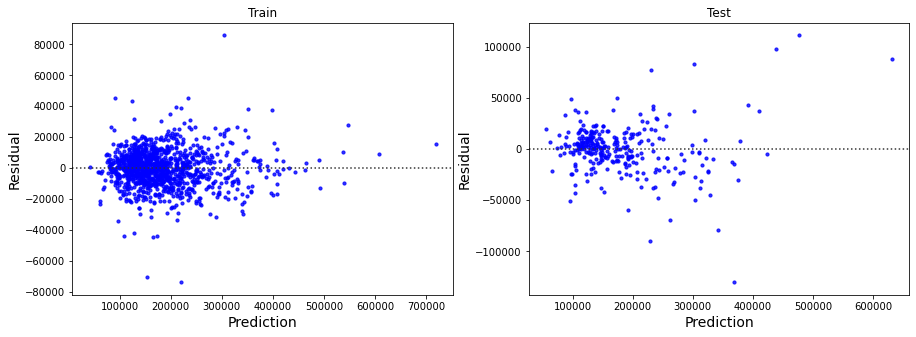

In [32]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The residual plot better than before when using transform by yeo-johnson`

In [33]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error').head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotPorch,HouseRate_Cond_and_Material,Age_of_House,pred,actual,error
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
433,160,RM,24.0,1920,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,376.0,TA,TA,CBlock,TA,TA,No,ALQ,471,Unf,0,294,765,GasA,Ex,Y,SBrkr,600,0,1365,1,0,1,1,2,1,TA,Min1,0,NaN,Detchd,Unf,2,TA,TA,Y,240,36,0,0,0,0,0,8,2007,WD,Normal,36,Average,36,122531.723602,122500,31.723602
1227,60,RL,86.0,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,1039,0,1933,0,0,2,1,4,1,Gd,Typ,1,Gd,BuiltIn,Fin,3,TA,TA,Y,100,18,0,0,0,0,0,1,2008,WD,Normal,18,Above Average,1,214051.987532,214000,51.987532
712,50,C (all),66.0,8712,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Stone,TA,TA,Mn,Unf,0,Unf,0,859,859,GasA,Gd,Y,SBrkr,319,0,1178,0,0,1,0,2,1,TA,Typ,0,NaN,Detchd,RFn,1,TA,TA,N,68,0,98,0,0,0,0,1,2010,WD,Abnorml,98,Above Average,110,102881.745451,102776,105.745451
782,60,RL,65.0,7153,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,PConc,Gd,TA,No,ALQ,387,Unf,0,374,761,GasA,Ex,Y,SBrkr,793,0,1603,0,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,124,0,0,0,0,0,7,2006,WD,Normal,124,Above Average,14,175622.522551,175900,277.477449
417,60,RL,74.0,7844,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,2Story,6,7,1978,1978,Hip,CompShg,HdBoard,HdBoard,BrkFace,203.0,TA,TA,CBlock,TA,TA,No,ALQ,209,Unf,0,463,672,GasA,TA,Y,SBrkr,728,0,1400,0,0,1,1,3,1,TA,Typ,1,TA,Attchd,Fin,2,TA,TA,Y,0,0,0,0,0,0,0,3,2006,WD,Normal,0,Good,28,149791.606904,149500,291.606904
1157,80,RL,85.0,9350,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,8,1965,1999,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,Gd,PConc,TA,TA,Gd,ALQ,633,Unf,0,586,1219,GasA,Gd,Y,SBrkr,0,0,1265,0,1,2,0,3,1,Gd,Typ,1,Gd,Attchd,RFn,2,TA,TA,Y,0,92,0,96,0,0,0,10,2008,WD,Normal,188,Good,43,179573.654289,179900,326.345711
1202,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,866,866,GasA,Ex,Y,SBrkr,913,0,1779,0,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,198,36,0,0,0,0,0,3,2009,WD,Normal,36,Above Average,11,197560.351653,197900,339.648347
680,20,RL,NaN,9945,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,57.0,TA,TA,CBlock,TA,TA,No,Rec,827,Unf,0,161,988,GasA,TA,Y,SBrkr,0,0,988,1,0,1,0,3,1,TA,Typ,0,NaN,Detchd,Unf,2,TA,TA,Y,0,0,0,0,0,0,0,10,2007,WD,Normal,0,Average,46,128122.917240,128500,377.082760
204,120,RM,NaN,4438,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.0,Gd,TA,PConc,Gd,TA,Av,GLQ,662,Unf,0,186,848,GasA,Ex,Y,SBrkr,0,0,848,1,0,1,0,1,1,Gd,Typ,1,Gd,Attchd,RFn,2,TA,TA,Y,149,0,0,0,0,0,0,1,2008,WD,Normal,0,Above Average,4,149394.317438,149000,394.317438


# Summary Result

In [34]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.9758742909177125
R2 Test : 0.9184541689442373
MAE Train : 8706.831598986802
MAE Test : 15758.335694629188
MSE Train : 143899007.2689906
MSE Test : 625483125.0338707
RMSE Train : 11995.791231469086
RMSE Test : 25009.66063412038


# Save the Model

In [35]:
save_model(model.best_estimator_, "Ames_House_Prediction_LGBM_Regressor.pkl")

Model is pickled as model/Ames_House_Prediction_LGBM_Regressor.pkl
